In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.Age.fillna(df['Age'].mean(), inplace = True)
df.drop(['Cabin','Name', 'PassengerId', 'Ticket'],axis = 1,inplace=True)

In [8]:
df['Sex'] = df['Sex'].map({'male':1, 'female':0})

In [9]:
df.dropna()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,S
1,1,1,0,38.000000,1,0,71.2833,C
2,1,3,0,26.000000,0,0,7.9250,S
3,1,1,0,35.000000,1,0,53.1000,S
4,0,3,1,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,S
887,1,1,0,19.000000,0,0,30.0000,S
888,0,3,0,29.699118,1,2,23.4500,S
889,1,1,1,26.000000,0,0,30.0000,C


In [10]:
df.groupby('Embarked')['Survived'].mean()*100

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

In [11]:
df = pd.get_dummies(df, columns=['Embarked']).astype(int)

In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22,1,0,7,0,0,1
1,1,1,0,38,1,0,71,1,0,0
2,1,3,0,26,0,0,7,0,0,1
3,1,1,0,35,1,0,53,0,0,1
4,0,3,1,35,0,0,8,0,0,1


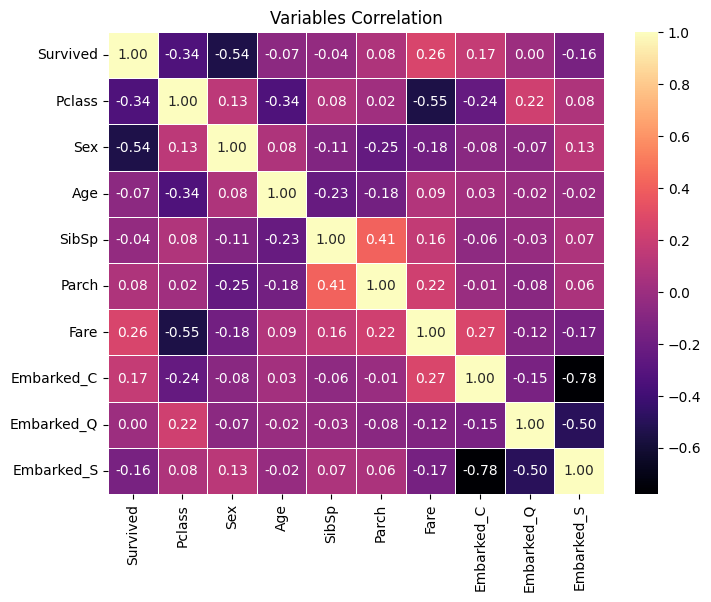

In [13]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt='.2f', linewidths=0.5)
plt.title('Variables Correlation')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

In [15]:
X = df.drop(columns=['Survived'], axis=1)
y = df['Survived']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [18]:
y_pred = tree.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       115
           1       0.80      0.64      0.71        64

    accuracy                           0.82       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.82      0.81       179



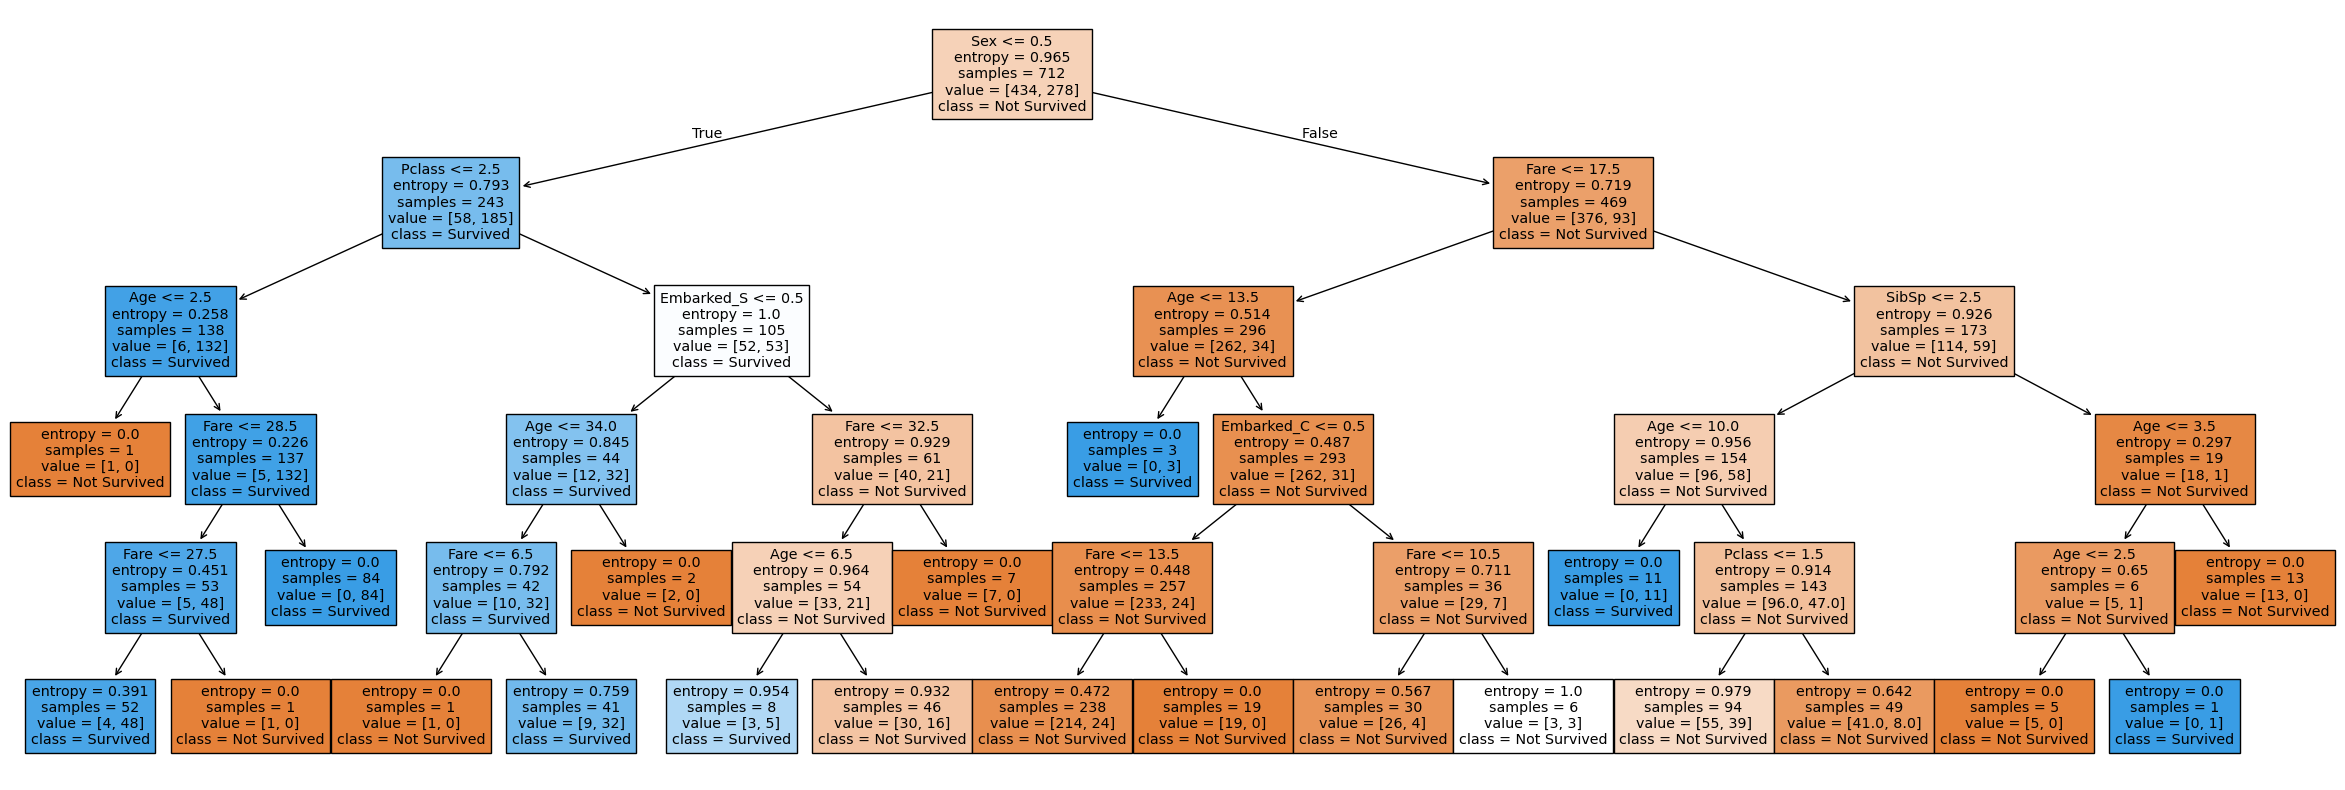

In [20]:
plt.figure(figsize=(30, 10))
plot_tree(tree, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()


In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
randomForest = RandomForestClassifier(n_estimators=100, random_state=42)
randomForest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
y_pred = randomForest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       115
           1       0.73      0.73      0.73        64

    accuracy                           0.81       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



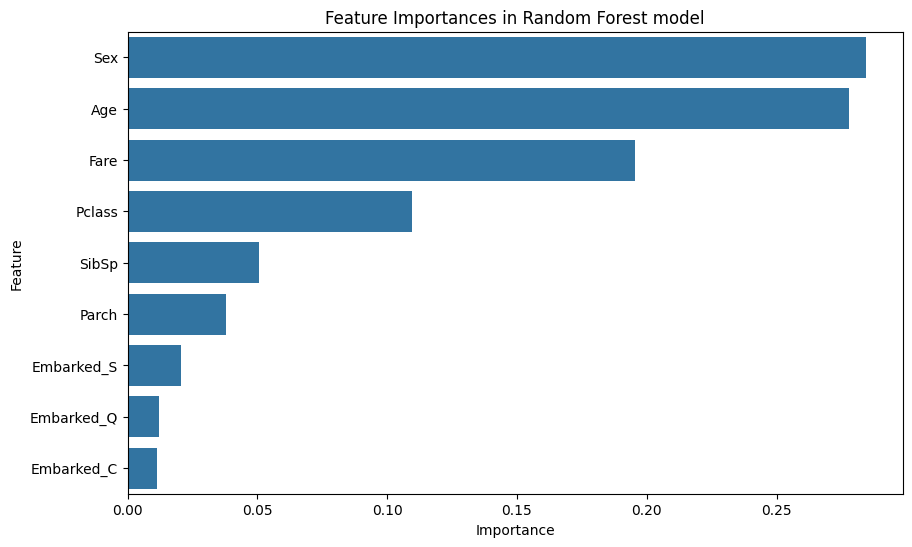

In [40]:
importances = randomForest.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances in Random Forest model')
plt.show()

We can also use a tree-based model such as LightGBM, a gradient boosting framework that uses tree-based learning algorithms

In [38]:
import lightgbm as lgbm
from sklearn.metrics import accuracy_score

train_data = lgbm.Dataset(data=X_train, label=y_train)
test_data = lgbm.Dataset(data=X_test, label=y_test)

params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'num_leaves': 63,
    'learning_rate': 0.05,
    'n_estimators': 1000,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'is_unbalance': True,
    'verbose': -1,
}

modelX = lgbm.train(
    params,
    train_data,
    num_boost_round=1000,
    valid_sets=[test_data],
    callbacks=[
        lgbm.early_stopping(stopping_rounds=50),
        lgbm.log_evaluation(50),
    ]
)

y_pred = modelX.predict(X_test)
y_pred_class = [1 if p > 0.5 else 0 for p in y_pred]

accuracy = accuracy_score(y_test, y_pred_class)
print(f'Accuracy: {accuracy:.4f}')

Training until validation scores don't improve for 50 rounds
[50]	valid_0's binary_logloss: 0.428746
[100]	valid_0's binary_logloss: 0.41779
Early stopping, best iteration is:
[76]	valid_0's binary_logloss: 0.414345
Accuracy: 0.8324


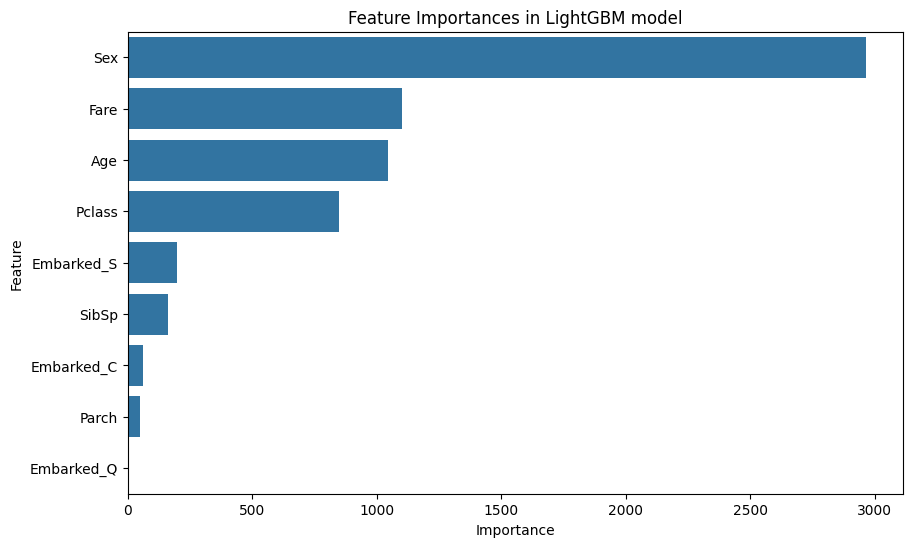

In [39]:
importances = modelX.feature_importance(importance_type='gain')

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances in LightGBM model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()